Let's we interested in Ethereum, and Dogecoin and Bitcoin based on portfolio optimization and we want to predict the near future of the prices of these cryptocurrencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Import data

In [3]:
crypto = pd.read_csv("cryptocurrencies_historical_data")

crypto = crypto.set_index('Date')

crypto.index = pd.to_datetime(crypto.index)

crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-03 to 2023-07-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTCUSDT   1095 non-null   float64
 1   ETHUSDT   1095 non-null   float64
 2   XRPUSDT   1095 non-null   float64
 3   DOGEUSDT  1095 non-null   float64
 4   LTCUSDT   1095 non-null   float64
 5   ADAUSDT   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


## Data Exploration Cryptocurrencies

In [18]:
crypto = crypto[["BTCUSDT", "ETHUSDT", "DOGEUSDT"]]

crypto.head(5)

,BTCUSDT,ETHUSDT,DOGEUSDT
Date,,,
2020-07-03,9058.26,224.87,0.002314
2020-07-04,9135.46,229.17,0.002301
2020-07-05,9069.41,227.56,0.002303
2020-07-06,9344.20,241.60,0.002619
2020-07-07,9257.39,239.39,0.003136


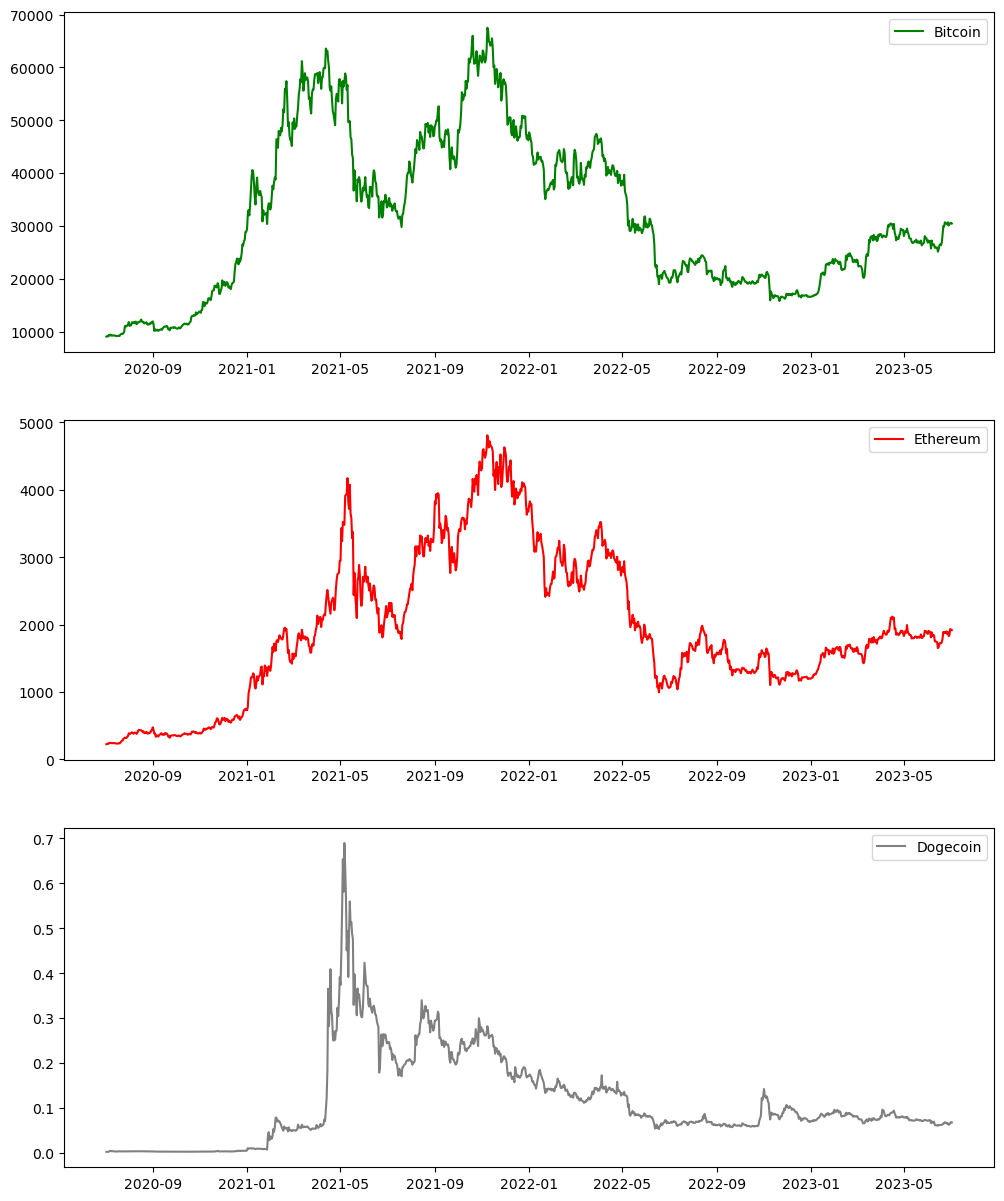

In [32]:
# Visualize prices

fig, axs = plt.subplots(3, 1, figsize = (12, 15))

axs[0].plot(crypto["BTCUSDT"], label = "Bitcoin", color = "green")
axs[1].plot(crypto["ETHUSDT"], label = "Ethereum", color = "red")
axs[2].plot(crypto["DOGEUSDT"], label = "Dogecoin", color = "grey")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

In [35]:
crypto.describe().T

,count,mean,std,min,25%,50%,75%,max
BTCUSDT,1095.0,31748.967342,14769.104040,9058.260000,19662.475000,29091.88000,42949.1900,67525.83000
ETHUSDT,1095.0,1946.458932,1087.852568,224.870000,1252.235000,1792.22000,2700.2850,4807.98000
DOGEUSDT,1095.0,0.114271,0.104135,0.002301,0.058655,0.07919,0.1607,0.68982


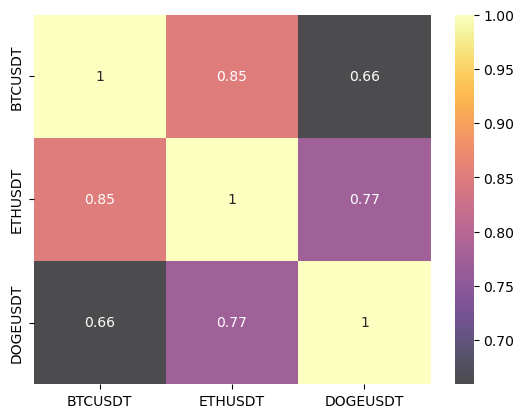

In [65]:
# Let's do correlation analysis again.

correlation = crypto.corr()

sns.heatmap(correlation, annot = True, cmap = 'inferno', alpha = 0.7)

plt.show()

### Decomposition analysis

In [136]:
def decomposition(data, method = str):
    
    decomposition = sm.tsa.seasonal_decompose(data, model = method)
    
    trend = decomposition.trend
    
    seasonality = decomposition.seasonal
    
    resid = decomposition.resid
    
    fig, axs = plt.subplots(4, 1, figsize = (10, 16))
    
    axs[0].plot(data, label = "Original Data")
    axs[1].plot(trend, label = "Trend")
    axs[2].plot(seasonality, label = "Seasonal")
    axs[3].plot(resid, label = "Residuals")
    
    axs_ = [0, 1, 2, 3]
    
    for ax in axs_:
        axs[ax].legend()
    


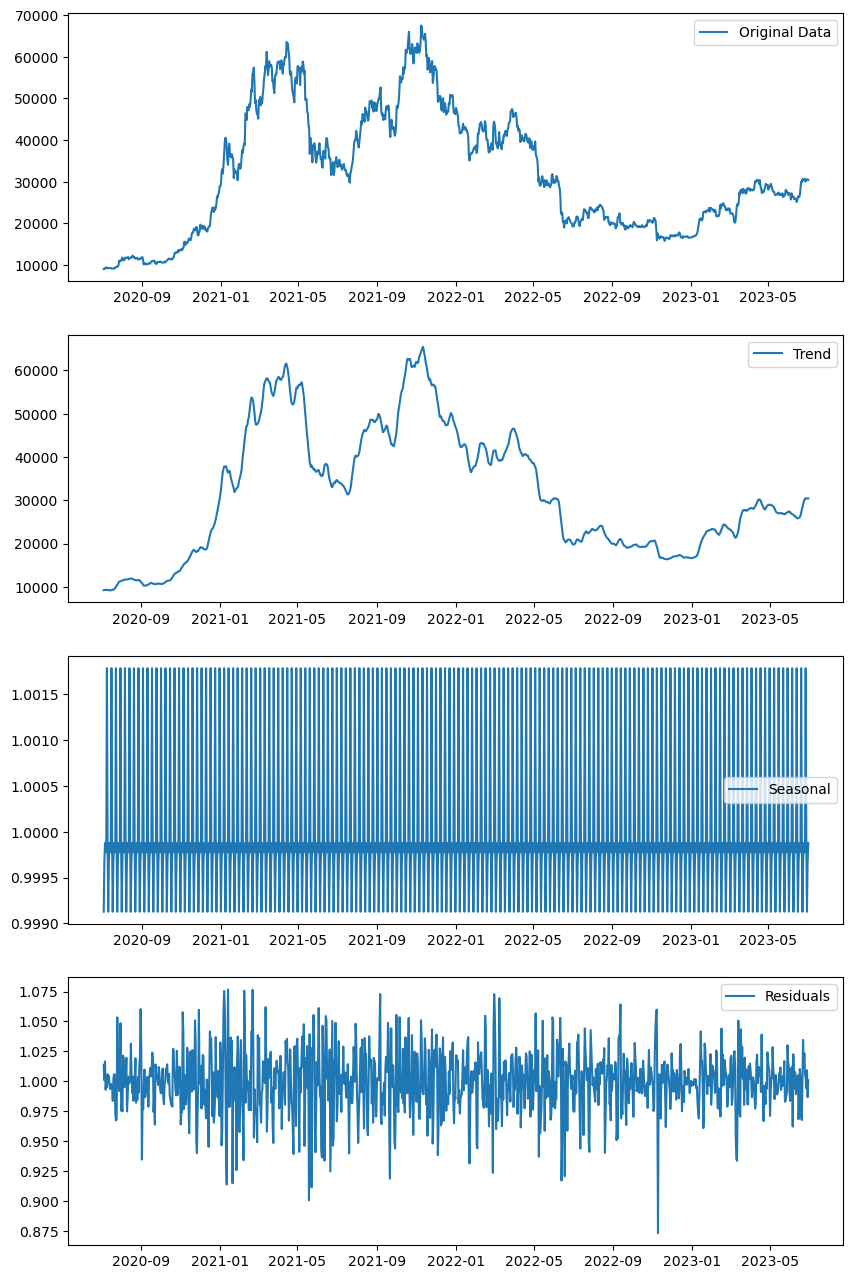

In [138]:
decomposition(crypto["BTCUSDT"], method = "multiplicative")

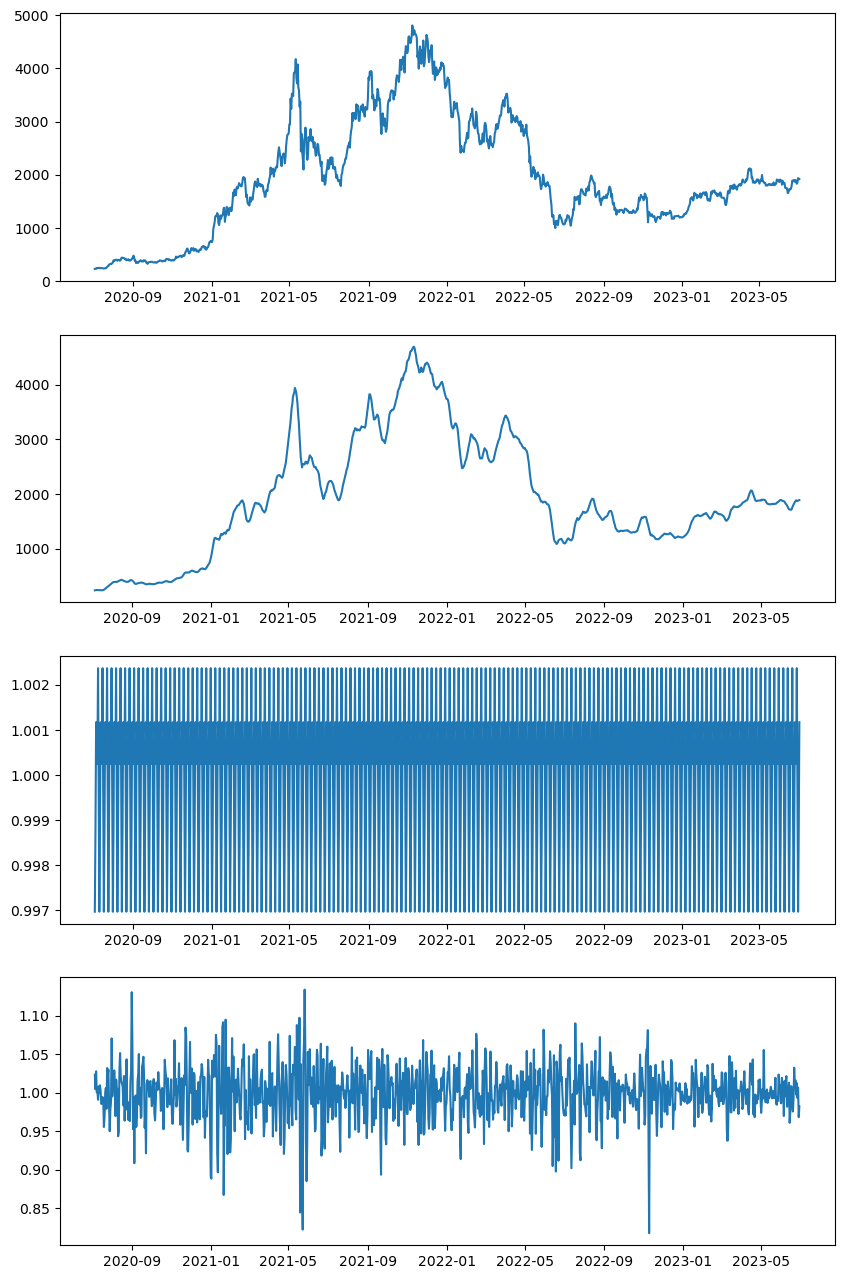

In [119]:
decomposition(crypto["ETHUSDT"], method = "multiplicative")

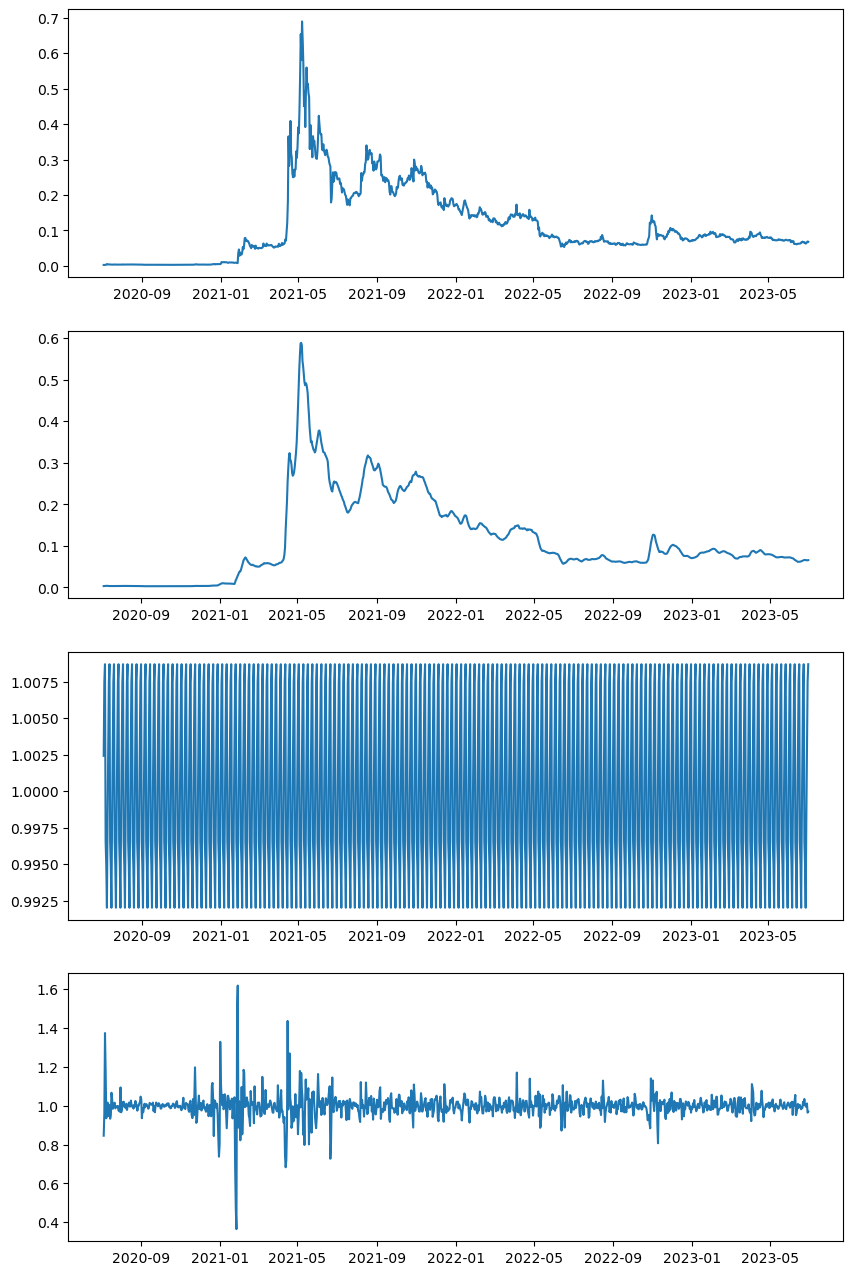

In [122]:
decomposition(crypto["DOGEUSDT"], method = "multiplicative")